___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [7]:
df.isna().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [9]:
df = df.dropna()

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [16]:
df['review'].str.isspace().sum()

27

In [17]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [19]:
df[df['review'].str.isspace()].index

Int64Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,
             501,  633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525,
            1531, 1763, 1851, 1905, 1993],
           dtype='int64')

In [21]:
df = df.drop(index=df[df['review'].str.isspace()].index)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


27

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [23]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [25]:
negatives = df[df['label']=='neg']['review']
positives = df[df['label']=='pos']['review']
negatives.head()

0    how do films like mouse hunt get into theatres...
1    some talented actresses are blessed with a dem...
4    my first press screening of 1998 and already i...
5    to put it bluntly , ed wood would have been pr...
6    synopsis : melissa , a mentally-disturbed woma...
Name: review, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
negs=cv.fit_transform(negatives)

{'films': 9152,
 'like': 14210,
 'mouse': 15983,
 'hunt': 11855,
 'theatres': 24529,
 'isn': 12921,
 'law': 13916,
 'diabolical': 6683,
 'load': 14353,
 'claptrap': 4469,
 'steven': 23318,
 'speilberg': 22873,
 'dreamworks': 7397,
 'studio': 23583,
 'hollywood': 11543,
 'family': 8836,
 'fare': 8867,
 'deadly': 6124,
 'worst': 27168,
 'takes': 24183,
 'bare': 2144,
 'threads': 24630,
 'plot': 18292,
 'tries': 25188,
 'prop': 19010,
 'overacting': 17214,
 'flat': 9302,
 'stupid': 23615,
 'slapstick': 22308,
 'makes': 14793,
 'comedies': 4820,
 'jingle': 13137,
 'way': 26680,
 'look': 14450,
 'decent': 6182,
 'comparison': 4901,
 'writer': 27224,
 'adam': 675,
 'rifkin': 20530,
 'director': 6839,
 'gore': 10435,
 'verbinski': 26198,
 'names': 16206,
 'chiefly': 4258,
 'responsible': 20296,
 'swill': 24047,
 'worth': 27169,
 'concerns': 5018,
 'brothers': 3323,
 'nathan': 16249,
 'lane': 13816,
 'appalling': 1386,
 'lee': 14002,
 'evens': 8384,
 'inherit': 12478,
 'poorly': 18449,
 'run':

In [41]:
def find_word(index):
    vocabulary = cv.vocabulary_
    for word in vocabulary.keys():
        if vocabulary[word] == index:
            return word

top_negs=pd.DataFrame(negs.todense()).sum().nlargest(20).reset_index()
top_negs['index']=top_negs['index'].map(find_word)
top_negs

,index,0
0,film,4063
1,movie,3131
2,like,1808
3,just,1480
4,time,1127
5,good,1117
6,bad,997
7,character,926
8,story,908
9,plot,888


In [42]:
poss=cv.fit_transform(positives)
top_poss=pd.DataFrame(poss.todense()).sum().nlargest(20).reset_index()
top_poss['index']=top_poss['index'].map(find_word)
top_poss

,index,0
0,film,5002
1,movie,2389
2,like,1721
3,just,1273
4,story,1199
5,good,1193
6,time,1175
7,character,1037
8,life,1032
9,characters,957


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [43]:
from sklearn.model_selection import train_test_split
x = df['review']
y = df['label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('nb',MultinomialNB())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
preds = pipe.predict(x_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



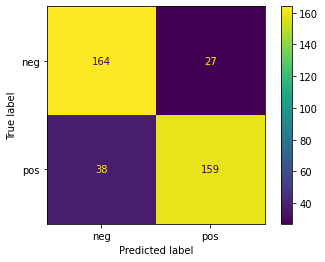

## Great job!
